In [39]:
import numpy as np
import statsmodels as sm
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARMA

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [27]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
m = sm.tsa.arima_process.ArmaProcess(ar, ma)
print(type(m))

<class 'statsmodels.tsa.arima_process.ArmaProcess'>


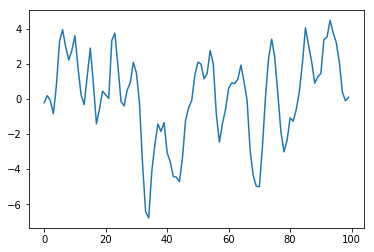

In [30]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

True
True


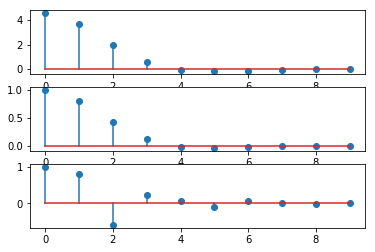

In [32]:
print(m.isstationary)
print(m.isinvertible)
plt.subplot(311)
plt.stem(m.acovf(10))
plt.subplot(312)
plt.stem(m.acf(10))
plt.subplot(313)
plt.stem(m.pacf(10))
plt.show()

In [40]:
m2 = sm.tsa.arima_model.ARMA(x, (2, 2))
print(type(m2))
r = m2.fit(disp=False)
print(type(r))
print(r.summary())

<class 'statsmodels.tsa.arima_model.ARMA'>
<class 'statsmodels.tsa.arima_model.ARMAResultsWrapper'>
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                -144.231
Method:                       css-mle   S.D. of innovations              1.011
Date:                Mon, 13 Aug 2018   AIC                            300.462
Time:                        20:14:37   BIC                            316.093
Sample:                             0   HQIC                           306.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.533      0.216      0.829      -0.929       1.159
ar.L1.y        0.6593      0.17

In [41]:
r.forecast(20)[0]

array([0.56132684, 0.48980471, 0.31908565, 0.21344158, 0.16027767,
       0.13542893, 0.12418024, 0.11916363, 0.11694246, 0.1159625 ,
       0.11553091, 0.115341  , 0.11525747, 0.11522073, 0.11520458,
       0.11519748, 0.11519436, 0.11519299, 0.11519238, 0.11519212])

In [42]:
r.predict(100, 120)

array([0.56132684, 0.48980471, 0.31908565, 0.21344158, 0.16027767,
       0.13542893, 0.12418024, 0.11916363, 0.11694246, 0.1159625 ,
       0.11553091, 0.115341  , 0.11525747, 0.11522073, 0.11520458,
       0.11519748, 0.11519436, 0.11519299, 0.11519238, 0.11519212,
       0.115192  ])

/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first c

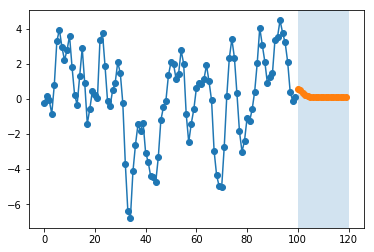

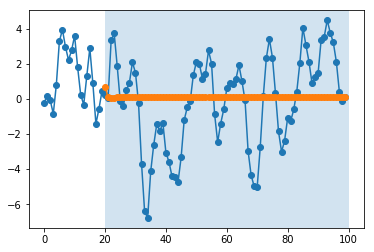

In [45]:
plt.figure(1)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 100, r.forecast(20)[0]], marker='o'); plt.axvspan(xmin=100, xmax=120, alpha=0.2)
plt.figure(2)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 20, r.predict(20, dynamic=True)], marker='o'); plt.axvspan(xmin=20, xmax=100, alpha=0.2)
plt.show()